<a href="https://colab.research.google.com/github/Rahul-7131/Internship-Project/blob/master/Exploratory_Data_Analysis_of_Car_Features_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Project on Exploratory Data Analysis of Car features

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.We often use plotting in EDA for the better understanding of a particular model or data.Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more. EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.EDA is different from initial data analysis (IDA), which focuses more narrowly on checking assumptions required for model fitting and hypothesis testing, and handling missing values and making transformations of variables as needed. EDA encompasses IDA.  

In this project, I performed Exploratory data analysis on how the different features of a car and its price are related. The data comes from the Kaggle dataset "Car Features and MSRP". It describes almost 12,000 car models, sold in the USA between 1990 and 2017, with the market price (new or used) and some features. So in this notebook, we will explore the data and make it ready for modeling.


# Step 1 :-

**(a) Importing the Required Libraries for our Project**

In [1]:
import pandas as pd              
import numpy as np               
import matplotlib
import matplotlib.pyplot as plt  #for visualization
import seaborn as sns            #for visualization     
import sklearn                   #for regression 
%matplotlib inline              

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**(b) Importing the dataset downloaded from kaggle**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [3]:
import io
car_data = pd.read_csv(io.BytesIO(uploaded['data.csv']))
print("Data has been loaded successfully") 

Data has been loaded successfully


**(c) Printing the dataset**

In [4]:
print(car_data)

          Make       Model  Year  ... city mpg  Popularity   MSRP
0          BMW  1 Series M  2011  ...       19        3916  46135
1          BMW    1 Series  2011  ...       19        3916  40650
2          BMW    1 Series  2011  ...       20        3916  36350
3          BMW    1 Series  2011  ...       18        3916  29450
4          BMW    1 Series  2011  ...       18        3916  34500
...        ...         ...   ...  ...      ...         ...    ...
11909    Acura         ZDX  2012  ...       16         204  46120
11910    Acura         ZDX  2012  ...       16         204  56670
11911    Acura         ZDX  2012  ...       16         204  50620
11912    Acura         ZDX  2013  ...       16         204  50920
11913  Lincoln      Zephyr  2006  ...       17          61  28995

[11914 rows x 16 columns]


**(d) Checking the datatype of dataset**

In [5]:
print("The various Datatypes in the dataset are:")
car_data.dtypes

The various Datatypes in the dataset are:


Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

**(e) Observing the Statistical Summary**

In [6]:
print("Statistical Summary :")
car_data.describe()


Statistical Summary :


,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


**(f) Observing the Shape of the dataset**

In [7]:
print("The number of rows and columns are : ")
car_data.shape #format:(rows,columns)

The number of rows and columns are : 


(11914, 16)

**(g) Checking for Null values in each column**

In [8]:
bool_series_make = pd.isnull(car_data["Make"])  # for 1st column 'Make'
car_data[bool_series_make].shape                # Number of null values


(0, 16)

In [9]:
bool_series_model = pd.isnull(car_data["Model"])  # for 2nd column 'Model'
car_data[bool_series_model].shape                 # Number of null values


(0, 16)

In [10]:
bool_series_year = pd.isnull(car_data["Year"])  # for 3rd column 'Year'
car_data[bool_series_year].shape                # Number of null values


(0, 16)

In [11]:
bool_series_egt = pd.isnull(car_data["Engine Fuel Type"])  # for 4th column 'Engine Fuel Type'
car_data[bool_series_egt].shape                            # Number of null values


(3, 16)

In [12]:
bool_series_ehp = pd.isnull(car_data["Engine HP"])  # for 5th column 'Engine HP'
car_data[bool_series_ehp].shape                     # Number of null values


(69, 16)

In [13]:
bool_series_ecy= pd.isnull(car_data["Engine Cylinders"])  # for 6th column 'Engine Cylinders'
car_data[bool_series_ecy].shape                           # Number of null values


(30, 16)

In [14]:
bool_series_ttype = pd.isnull(car_data["Transmission Type"])  # for 7th column 'Transmission Type'
car_data[bool_series_ttype].shape                             # Number of null values


(0, 16)

In [15]:
bool_series_dwheel = pd.isnull(car_data["Driven_Wheels"])  # for 8th column 'Driven_Wheels'
car_data[bool_series_dwheel].shape                         # Number of null values


(0, 16)

In [16]:
bool_series_doors = pd.isnull(car_data["Number of Doors"])  # for 9th column 'Number of Doors'
car_data[bool_series_doors].shape                           # Number of null values


(6, 16)

In [17]:
bool_series_market = pd.isnull(car_data["Market Category"])  # for 10th column 'Market Category'
car_data[bool_series_market].shape                           # Number of null values


(3742, 16)

In [18]:
bool_series_vsize = pd.isnull(car_data["Vehicle Size"])  # for 11th column 'Vehicle Size'
car_data[bool_series_vsize].shape                        # Number of null values


(0, 16)

In [19]:
bool_series_vstyle = pd.isnull(car_data["Vehicle Style"])  # for 12th column 'Vehicle Style'
car_data[bool_series_vstyle].shape                         # Number of null values


(0, 16)

In [20]:
bool_series_highway = pd.isnull(car_data["highway MPG"])  # for 13th column 'highway MPG'
car_data[bool_series_highway].shape                       # Number of null values


(0, 16)

In [21]:
bool_series_city = pd.isnull(car_data["city mpg"])  # for 14th column 'city mpg'
car_data[bool_series_city].shape                    # Number of null values


(0, 16)

In [22]:
bool_series_popular= pd.isnull(car_data["Popularity"])  # for 15th column 'Popularity'
car_data[bool_series_popular].shape                     # Number of null values


(0, 16)

In [23]:
bool_series_msrp = pd.isnull(car_data["MSRP"])  # for 16th column 'MSRP'
car_data[bool_series_msrp].shape                # Number of null values

(0, 16)

# Step 2:-


**Removing the columns which are of less Relevance**

In [24]:
car_data=car_data.drop("Market Category",1)

In [25]:
car_data.dtypes  #checking for successful deletion

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

Here the column 'Market Category' was omitted since it contained more than 25% Null Values and therefore it was of less relevance.

# Step 3:-

**Renaming the following columns "Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"**

In [26]:
car_data.rename(columns = {"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"}, inplace = True)

print(car_data.columns) #to check the implementation of rename changes

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'HP', 'Cylinders',
       'Transmission', 'Drive Mode', 'Number of Doors', 'Vehicle Size',
       'Vehicle Style', 'MPG-H', 'MPG-C', 'Popularity', 'Price'],
      dtype='object')


# Step 4:-

**(a) Searching & Removing Duplicates in the Data**

In [27]:
duplicate_rows_data = car_data[car_data.duplicated()] # Searching for duplicate data
print("Number of duplicate rows: ", duplicate_rows_data.shape)

Number of duplicate rows:  (720, 15)


In [28]:
car_data = car_data.drop_duplicates() # Clearing the duplicate data found
print('Shape of the dataset after clearing duplicate data :',car_data.shape)

Shape of the dataset after clearing duplicate data : (11194, 15)


**(b) Searching and Removing Null Values/Missing values from Data ***

Since we have already found the null values we will now replace them according to their datatypes.
example- In the case of 'float values' we will replace the null values by 'mean' and in the case of 'categorical values' we will replace the null values by 'mode'

**(i) 'Engine fuel type' is categorical valued column thus replacing the null values here with mode**

In [29]:
mode=car_data['Engine Fuel Type'].mode()  # Checking for mode value
print("Mode : ")
mode

Mode : 


0    regular unleaded
dtype: object

In [30]:
car_data["Engine Fuel Type"]=car_data["Engine Fuel Type"].fillna('regular unleaded') # Replacing null by mode
bool_series_egt = pd.isnull(car_data["Engine Fuel Type"])  
print("After replacing null values, number of nulls in column 'Engine Fuel Type':")
car_data[bool_series_egt].shape


After replacing null values, number of nulls in column 'Engine Fuel Type':


(0, 15)

**(ii) 'Engine HP' is real valued column so we replace null values by mean**

In [31]:
mean=car_data['HP'].mean()  # Checking for mean value
print("Mean : ")
mean

Mean : 


253.3905617977528

In [32]:
car_data["HP"]=car_data["HP"].fillna(mean) # Replacing null by mean
bool_series_egt = pd.isnull(car_data["HP"])  
print("After replacing null values,number of nulls in column 'HP':")
car_data[bool_series_egt].shape

After replacing null values,number of nulls in column 'HP':


(0, 15)

**(iii) 'Engine cylinders' is categorical value hence replacing null** **values by mode** 

In [33]:
mode=car_data['Cylinders'].mode()  # Checking for mode value
print("Mode : ")
mode

Mode : 


0    4.0
dtype: float64

In [34]:
car_data["Cylinders"]=car_data["Cylinders"].fillna(4.0) # Replacing null by mode
bool_series_egt = pd.isnull(car_data["Cylinders"]) 
print("After replacing null values, number of nulls in column 'Cylinders':") 
car_data[bool_series_egt].shape


After replacing null values, number of nulls in column 'Cylinders':


(0, 15)

**(iv) 'Number of doors' is categorical values hence replacing null values by mode**

In [35]:
mode=car_data['Number of Doors'].mode() # Checking for mode value
print("Mode : ")
mode

Mode : 


0    4.0
dtype: float64

In [36]:
car_data["Number of Doors"]=car_data["Number of Doors"].fillna(4.0) # Replacing null by mode
bool_series_egt = pd.isnull(car_data["Number of Doors"])  
print("After replacing null values, number of nulls in column 'Number of Doors':") 
car_data[bool_series_egt].shape

After replacing null values, number of nulls in column 'Number of Doors':


(0, 15)

**Hence we have successfully removed all the null/missing values as well as duplicate values from the dataset.**

In [37]:
print('Total number of rows and columns without null/missing values and duplicates:')
car_data.shape

Total number of rows and columns without null/missing values and duplicates:


(11194, 15)

# Step 5:-

**Plotting Graphs for various columns in order to check outliers and further removing them from our dataset**

In [38]:
car_data.dtypes #To check datatypes of columns as we can only plot floats and integers

Make                 object
Model                object
Year                  int64
Engine Fuel Type     object
HP                  float64
Cylinders           float64
Transmission         object
Drive Mode           object
Number of Doors     float64
Vehicle Size         object
Vehicle Style        object
MPG-H                 int64
MPG-C                 int64
Popularity            int64
Price                 int64
dtype: object

**For finding outliers, we will plot box plot of 'HP', 'MPG-H', 'MPG-C', 'Popularity' and 'Price'. Although 'Year' and 'Cylinders' have datatype as integer and float respectively, we will not plot the box plot of these columns because these two columns will not affect the 'Price' column significantly which is our target value.**

**(i) Box plot of 'HP'**

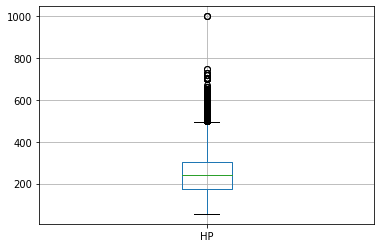

In [39]:
boxplot = car_data.boxplot(column=['HP'])

In [40]:
print("For column 'HP' :")
car_data['HP'].describe()  #for statistical info

For column 'HP' :


count    11194.000000
mean       253.390562
std        109.830525
min         55.000000
25%        172.000000
50%        240.000000
75%        303.000000
max       1001.000000
Name: HP, dtype: float64

In [41]:
index = car_data[(car_data['HP'] >= 303*1.5)|(car_data['HP'] <= 172/1.5)].index 
car_data.drop(index, inplace=True) #Removing the outliers
print("After removing Outliers: ", car_data.shape)
car_data['HP'].describe() #for statistical info after removal of outliers

After removing Outliers:  (10118, 15)


count    10118.000000
mean       242.041604
std         79.261416
min        115.000000
25%        175.000000
50%        236.000000
75%        295.000000
max        454.000000
Name: HP, dtype: float64

**(ii) Box plot of 'MPG-H'**

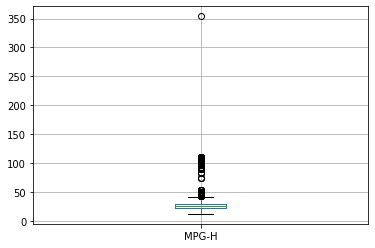

In [42]:
boxplot = car_data.boxplot(column=['MPG-H'])

In [43]:
print(" For column 'MPG-H' :")
car_data['MPG-H'].describe() #For Statistical info


 For column 'MPG-H' :


count    10118.000000
mean        26.651314
std          8.998390
min         12.000000
25%         22.000000
50%         26.000000
75%         30.000000
max        354.000000
Name: MPG-H, dtype: float64

In [44]:
print("Before removing Outliers: ",car_data.shape)
index = car_data[(car_data['MPG-H'] >= 30*1.5)|(car_data['MPG-H'] <= 22/1.5)].index
car_data.drop(index, inplace=True) #Removing the outliers
print("After removing Outliers: ",car_data.shape)
car_data['MPG-H'].describe()  #For Statistical info after removing outliers

Before removing Outliers:  (10118, 15)
After removing Outliers:  (9964, 15)


count    9964.000000
mean       26.074769
std         5.776625
min        15.000000
25%        22.000000
50%        26.000000
75%        30.000000
max        44.000000
Name: MPG-H, dtype: float64

**(iii) Box plot of 'MPG_C'**

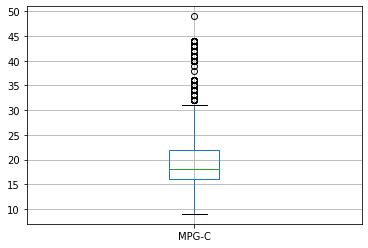

In [45]:
boxplot = car_data.boxplot(column=['MPG-C'])

In [46]:
print("For column 'MPG-C' :")
car_data['MPG-C'].describe() #For Statistical info

For column 'MPG-C' :


count    9964.000000
mean       19.054396
std         4.771971
min         9.000000
25%        16.000000
50%        18.000000
75%        22.000000
max        49.000000
Name: MPG-C, dtype: float64

In [47]:
print("Before removing Outliers: ",car_data.shape)
index = car_data[(car_data['MPG-C'] >= 22*1.5)|(car_data['MPG-C'] <= 16/1.5)].index
car_data.drop(index, inplace=True) #Removing the outliers
print("After removing Outliers: ",car_data.shape)
car_data['MPG-C'].describe()  #For Statistical info after removing outliers

Before removing Outliers:  (9964, 15)
After removing Outliers:  (9808, 15)


count    9808.000000
mean       18.864396
std         4.244871
min        11.000000
25%        16.000000
50%        18.000000
75%        22.000000
max        32.000000
Name: MPG-C, dtype: float64

**(iv) Box plot of 'Popularity'**

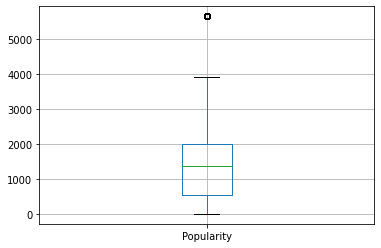

In [48]:
boxplot = car_data.boxplot(column=['Popularity'])

In [49]:
print("For column 'Popularity': ")
car_data['Popularity'].describe() #For Statistical info

For column 'Popularity': 


count    9808.000000
mean     1567.934543
std      1470.412453
min         2.000000
25%       549.000000
50%      1385.000000
75%      2009.000000
max      5657.000000
Name: Popularity, dtype: float64

In [50]:
print("Before removing Outliers: ",car_data.shape)
index = car_data[(car_data['Popularity'] >= 2009*1.5)|(car_data['Popularity'] <= 549/1.5)].index
car_data.drop(index, inplace=True) #Removing the outliers
print("After removing Outliers: ",car_data.shape)
car_data['Popularity'].describe()  #For Statistical info after removing outliers

Before removing Outliers:  (9808, 15)
After removing Outliers:  (7002, 15)


count    7002.000000
mean     1253.863468
std       604.517303
min       376.000000
25%       617.000000
50%      1385.000000
75%      1851.000000
max      2774.000000
Name: Popularity, dtype: float64

**(v) Box plot of 'Price'**

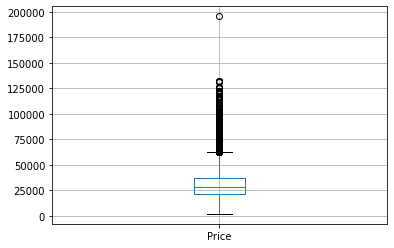

In [51]:
boxplot = car_data.boxplot(column=['Price'])

In [52]:
print("For column 'Price' :")
car_data['Price'].describe() #For Statistical info


For column 'Price' :


count      7002.000000
mean      30466.074264
std       18047.687276
min        2000.000000
25%       21191.250000
50%       28360.000000
75%       37650.000000
max      195840.000000
Name: Price, dtype: float64

In [53]:
print("Before removing Outliers: ",car_data.shape)
index = car_data[(car_data['Price'] >= 37650*1.5)|(car_data['Price'] <= 21191/1.5)].index
car_data.drop(index, inplace=True) #Removing the outliers
print("After removing Outliers: ",car_data.shape)
car_data['Price'].describe()  #For Statistical info after removing outliers

Before removing Outliers:  (7002, 15)
After removing Outliers:  (5738, 15)


count     5738.000000
mean     30541.046532
std       9508.921834
min      14155.000000
25%      23266.250000
50%      29120.000000
75%      36646.250000
max      56425.000000
Name: Price, dtype: float64

**Now we have successfully removed the outliers from our dataset and therefore completed the preprocessing of data**

# Step 6:-

**Finding the car brands which are represented the most in our dataset and then finding the average price among the top car brands.**

We start by adding a new column 'count' in our dataset for counting the frequency of car brand.

In [54]:
make_price=car_data[['Make','Price']]  #All the columns are not needed
make_price['count'] = make_price.groupby('Make')['Make'].transform('count')  #Adding new column 'count'
make_price


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Make,Price,count
32,FIAT,27495,39
33,FIAT,24995,39
34,FIAT,28195,39
64,Chrysler,25170,159
65,Chrysler,23950,159
...,...,...,...
11866,GMC,56225,395
11870,GMC,51315,395
11873,GMC,48315,395
11877,GMC,51530,395


In [55]:
make_price=make_price.sort_values(by=['count'],ascending=False) 
#Sorting the data based on 'count' in descending order as we need to find the top 10 car brands
make_price

,Make,Price,count
9451,Chevrolet,26460,817
9622,Chevrolet,27585,817
9615,Chevrolet,39965,817
9616,Chevrolet,35590,817
9617,Chevrolet,27975,817
...,...,...,...
3917,Lotus,51845,7
3918,Lotus,54990,7
7740,Plymouth,44625,3
7739,Plymouth,20901,3


In [56]:
make_price=make_price.drop(['count'],axis=1) #we can now drop the column 'Count' as we have got our columns in descending order
make_price

,Make,Price
9451,Chevrolet,26460
9622,Chevrolet,27585
9615,Chevrolet,39965
9616,Chevrolet,35590
9617,Chevrolet,27975
...,...,...
3917,Lotus,51845
3918,Lotus,54990
7740,Plymouth,44625
7739,Plymouth,20901


In [57]:
make_price=make_price.groupby(['Make'],sort=False).mean() 
#Grouping the data of the same car brands and then finding the average price
make_price

,Price
Make,
Chevrolet,29579.149327
Toyota,32220.343629
Volkswagen,28323.224852
Nissan,31994.559165
GMC,34253.534177
Dodge,27439.285714
Honda,28298.002717
Mazda,24861.709265
Suzuki,20371.609756


 Top 10 car brands with their mean Price :


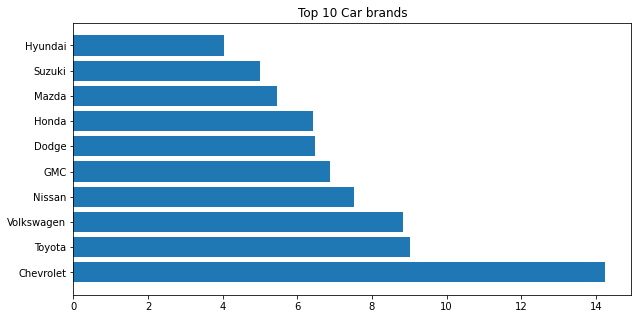

In [68]:
print(" Top 10 car brands with their mean Price :")
make_price.head(10) #Displays Top 10 car Brands with their average price

#Percentage of car per brand
counts = car_data['Make'].value_counts()*100/sum(car_data['Make'].value_counts())

#Top 10 car brands
popular_labels = counts.index[:10]
    
#Plot
plt.figure(figsize=(10,5))
plt.barh(popular_labels, width=counts[:10])
plt.title('Top 10 Car brands')
plt.show()

# Step 7:-

**Plotting the correlation matrix and documenting our insights**

In [59]:
print(" Co-relation matrix of dataset: ")
car_data.corr()

 Co-relation matrix of dataset: 


,Year,HP,Cylinders,Number of Doors,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.216660,-0.132461,0.140964,0.369093,0.351970,0.197893,0.296960
HP,0.216660,1.000000,0.786569,0.022889,-0.572546,-0.636311,0.179020,0.765274
Cylinders,-0.132461,0.786569,1.000000,0.027589,-0.732600,-0.765498,0.179729,0.509327
Number of Doors,0.140964,0.022889,0.027589,1.000000,-0.015166,0.007734,-0.017734,0.041721
MPG-H,0.369093,-0.572546,-0.732600,-0.015166,1.000000,0.943417,-0.031460,-0.328617
MPG-C,0.351970,-0.636311,-0.765498,0.007734,0.943417,1.000000,-0.032105,-0.373327
Popularity,0.197893,0.179020,0.179729,-0.017734,-0.031460,-0.032105,1.000000,0.022250
Price,0.296960,0.765274,0.509327,0.041721,-0.328617,-0.373327,0.022250,1.000000


**From this matrix we can see that 'Price' of vehicle is less** **correlated with 'Number of Doors' (0.041721) and 'Popularity' (0.**
**022250) as compared to other columns. We are checking the**
**co-relation only with 'Price' here, as it is our target value.**

**Highest co-relation of 'Price' is with : 'HP' (0.765274)**

**Highest anti co-relation of 'Price' is with : 'MPG-C' (-0.373327)**

# Step 8:-

**Performing EDA , plotting graphs (Heatmap and Scatterplots) and** **documenting the findings**

**(a) Plotting Heatmap**

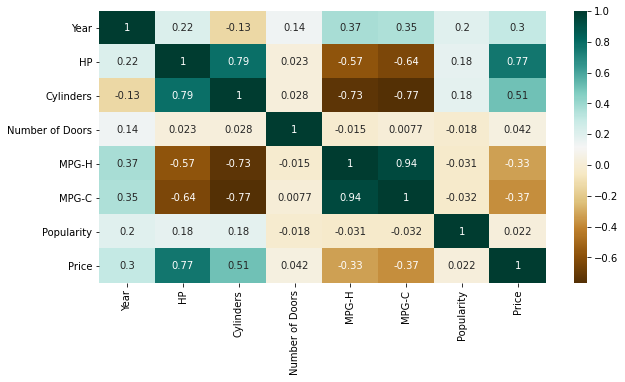

In [60]:
plt.figure(figsize=(10,5))
c= car_data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

**(b) Plotting Scatterplots**

**(i) Scatter plot of 'YEAR' vs 'PRICE'**

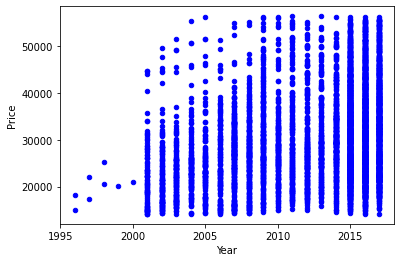

In [61]:
sc1 = car_data.plot.scatter(x='Year',
                      y='Price',
                      c='Blue')

From this plot it can be inferred that 'YEAR' does not affect the 'PRICE' significantly

**(ii) Scatterplot of 'HP' vs 'PRICE'**

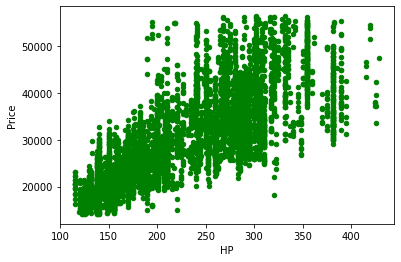

In [62]:
sc2 = car_data.plot.scatter(x='HP',
                      y='Price',
                      c='Green')

From this plot it can be inferred that 'HP' is directly proportional
to 'PRICE'  

**(iii) Scatterplot of 'CYLINDER' vs 'PRICE'**

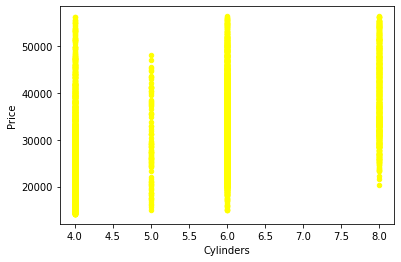

In [63]:
c3= car_data.plot.scatter(x='Cylinders',
                      y='Price',
                      c='Yellow')

This plot shows that 'CYLINDERS' also does not affect the 'PRICE'

**(iv) Scatterplot of 'MPG-H' vs 'PRICE'**

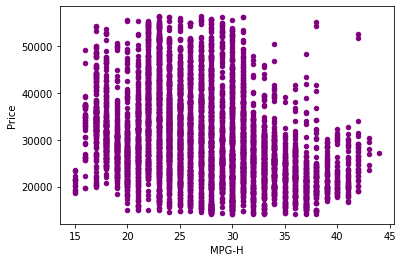

In [64]:

sc4= car_data.plot.scatter(x='MPG-H',
                      y='Price',
                      c='Purple')

From this plot it can be inferred that 'MPG-H' is slightly inversely proportional to 'PRICE'

**(v) Scatterplot of 'MPG-C' vs 'PRICE'**

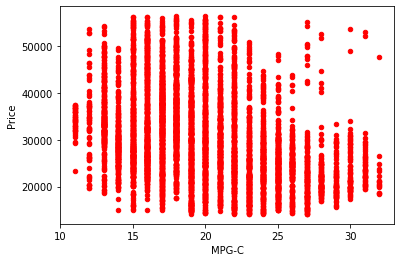

In [65]:
sc5= car_data.plot.scatter(x='MPG-C',
                      y='Price',
                      c='Red')

This plot is similar to the plot between 'MPG-H' vs 'Price'. Hence 'MPG-C' is also slightly inversely proportional to 'PRICE'

**(c) Plotting combined Scatterplots**

For analyzing our data more precisely, we plot the Scatterplot by taking two columns together against 'PRICE'.

(i) 'MPG-H' + 'HP' vs 'PRICE'

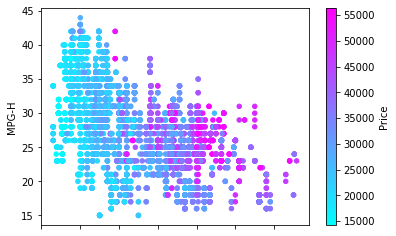

In [66]:

sc6 = car_data.plot.scatter(x='HP',
                      y='MPG-H',
                      c='Price',
                      colormap='cool')

**From this plot we can say that, 'Price' is more when there is high value of 'HP' and intermediate value of 'MPG-H'.**

(ii) 'MPG-C' + 'HP' vs 'PRICE'

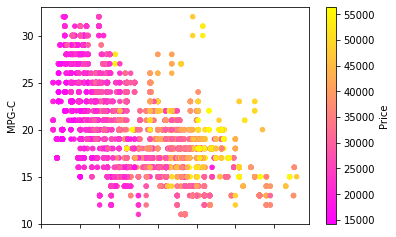

In [67]:
sc7 = car_data.plot.scatter(x='HP',
                      y='MPG-C',
                      c='Price',
                      colormap='spring')

**From this plot we can say that, 'Price' is more when there is high value of 'HP' and intermediate value of 'MPG-C'.**

# Machine Learning Model:-

Here we will apply Linear Regression for predicting the price of the car based on various factors.

**Introduction**

Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It’s used to predict values within a continuous range, (e.g. sales, price) rather than trying to classify them into categories (e.g. cat, dog). There are two main types:

**Simple Regression**

Simple linear regression uses traditional slope-intercept form, where m and b are the variables our algorithm will try to “learn” to produce the most accurate predictions. x represents our input data and y represents our prediction.

*y=mx+c*

**Multivariable regression**

A more complex, multi-variable linear equation might look like this, where w represents the coefficients, or weights, our model will try to learn.

*f(x,y,z)=w1x+w2y+w3z*

The variables x,y,z represent the attributes, or distinct pieces of information, we have about each observation.

In our case we will be using Multivariable Regression since we will consider 5 variables that is "MPG-H", "MPG-C", "Popularity", "HP", "Cylinders" .

In [69]:
x = car_data[['MPG-H', 'MPG-C', 'Popularity', 'HP','Cylinders']]
y = car_data['Price']

In [70]:
type(x)
x.head()

,MPG-H,MPG-C,Popularity,HP,Cylinders
32,35,26,819,160.0,4.0
33,35,26,819,160.0,4.0
34,35,26,819,160.0,4.0
64,36,23,1013,184.0,4.0
65,36,23,1013,184.0,4.0


In [71]:
type(y)
y.head()

32    27495
33    24995
34    28195
64    25170
65    23950
Name: Price, dtype: int64

**Splitting data in 80:20 ratio for training and testing our ML model**

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


**Construction and Training of Model**

In [83]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Printing the intercept and calculating the coefficients**

In [84]:
print(lr.intercept_)
coeff_data = pd.DataFrame(lr.coef_, x.columns, columns = ['Coefficient'])
coeff_data

1097.0980367657066


,Coefficient
MPG-H,-74.072149
MPG-C,387.830727
Popularity,-1.961511
HP,134.031197
Cylinders,-899.265262


**Checking R^2 score**

In [85]:
lr.score(X_train, y_train)

0.6253428372862944

**Prediction error plot:**

A prediction error plot shows the actual targets from the dataset against the predicted values generated by our model. This allows us to see how much variance is in the model.

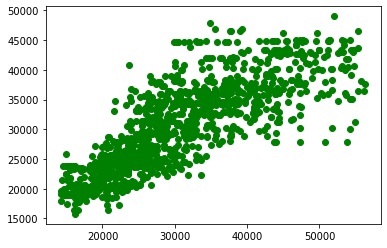

In [86]:
predictions = lr.predict(X_test)
plt.scatter(y_test, predictions,color="green")


**Residual Plot:**

A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a nonlinear model is more appropriate.



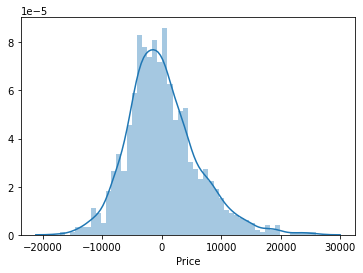

In [87]:
sns.distplot((y_test - predictions), bins = 50)

**Mean Absolute Error:**

In [88]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

MAE: 4516.146351638622


**Mean Squared Error:**

In [89]:
print('MSE:', metrics.mean_squared_error(y_test, predictions))

MSE: 35238466.820108525


**Root Mean Squared Error:**

In [90]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 5936.199695100269


Hence, As the error values are not too high, so we can say that our ML model is performing well